In [1]:
import pandas as pd
import numpy as np
import gensim
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import gensim.corpora as corpora
data=pd.read_excel('d:/srtp/content+price-684t.xlsx')
from gensim.utils import simple_preprocess
import spacy
nlp=spacy.load('en_core_web_sm',disable=['parser','ner'])

In [2]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence),deacc=True))
data_words=list(sent_to_words(data['content'][:10]))
def remove_stopwords(texts):
    nonstop=[]
    a=[]
    for doc in texts:
        for w in simple_preprocess(str(doc)):
                if w not in stopwords.words('english'):
                    a.append(w)
        nonstop.append(a)
        a=[]
    return nonstop
data_words_nostops = remove_stopwords(data_words)
def lemmatization(texts,allowed_postage=['NOUN','ADJ','VERB','ADV']):
    texts_out=[]
    for sent in texts:
        doc=nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postage])
    return texts_out
data_lemmatized=lemmatization(data_words_nostops,allowed_postage=['NOUN','ADJ','VERB','ADV'])
#doc2bow 时gensim中封装的一个方法 主要用于实现bow模型
#create dictionary
id2word=corpora.Dictionary(data_lemmatized)
#create corpus
texts=data_lemmatized
#term  document frequenct
corpus=[id2word.doc2bow(text) for text in texts]

In [3]:
lda_model=gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=id2word,
                                         num_topics=3,random_state=100,
                                         update_every=1,chunksize=100,
                                         passes=20,alpha='auto',per_word_topics=True)

In [4]:
import pprint
pprint.pprint(lda_model.print_topics())

[(0,
  '0.024*"say" + 0.011*"oil" + 0.008*"percent" + 0.008*"price" + '
  '0.007*"output" + 0.006*"production" + 0.006*"year" + 0.006*"cut" + '
  '0.006*"rdquo" + 0.006*"market"'),
 (1,
  '0.021*"say" + 0.010*"fuel" + 0.007*"year" + 0.007*"gas" + 0.005*"high" + '
  '0.005*"report" + 0.005*"new" + 0.005*"price" + 0.005*"oil" + '
  '0.004*"gasoline"'),
 (2,
  '0.013*"say" + 0.008*"game" + 0.008*"year" + 0.006*"team" + 0.006*"goal" + '
  '0.006*"point" + 0.005*"week" + 0.005*"oil" + 0.005*"big" + 0.004*"last"')]


In [5]:
topics_test = lda_model.get_document_topics(corpus)     
a=[]
for i in range(len(topics_test)):
    #print(topics_test[i])
    a.append(topics_test[i])

In [6]:
from keras import models
from keras import layers
from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, Activation, merge, Input, Lambda, Reshape
def build_model1():
    model=Sequential()
    model.add(Dense(64,activation='relu',input_shape=(3,)))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
    print(model.summary())
    return model

Using TensorFlow backend.
C:\Users\冯ziyue\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\冯ziyue\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\冯ziyue\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.in

In [7]:
#y=data['oilprice'][:20]
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
y0= min_max_scaler.fit_transform(data['oilprice'][:10].values.reshape(-1,1))
y0=map(lambda x:x[0],y0)
y0=pd.Series(y0)
def procee(a):
    b=[]
    for s in a:
        if len(s)==1:
            if s[0][0]==0:
                b.append([s[0][1],0,0])
            elif s[0][0]==1:
                b.append([0,s[0][1],0])
            else:
                b.append([0,0,s[0][1]])
        elif len(s)==2:
            if s[0][0]==0 and s[1][0]==1:
                b.append([s[0][1],s[1][1],0])
            elif s[0][0]==0 and s[1][0]==2:
                b.append([s[0][1],0,s[1][1]])
            else:
                b.append([0,s[0][1],s[1][1]])
        elif len(s)==3:
            b.append([s[0][1],s[1][1],s[2][1]])
    return b

In [8]:
m1=build_model1()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________
None


In [10]:

data_words1=list(sent_to_words(data['content'][20:30]))
data_words_nostops1 = remove_stopwords(data_words1)
data_lemmatized1=lemmatization(data_words_nostops,allowed_postage=['NOUN','ADJ','VERB','ADV'])
id2word=corpora.Dictionary(data_lemmatized1)
texts1=data_lemmatized1
#term  document frequenct
corpus1=[id2word.doc2bow(text) for text in texts1]
topics_test = lda_model.get_document_topics(corpus1) 

ba=[]

for i in range(len(topics_test)):
    ba.append(topics_test[i])

In [15]:

x_1=pd.DataFrame(procee(a),dtype='float64')
x_2=pd.DataFrame(procee(ba),dtype='float64')
yy=min_max_scaler.transform(data['oilprice'][20:30].values.reshape(-1,1))
y1=map(lambda x:x[0],yy)
y1=pd.Series(y1)

history=m1.fit(x_1,y0,batch_size=10,epochs=3,validation_data=(x_2,y1))

Instructions for updating:
Use tf.cast instead.
Train on 10 samples, validate on 10 samples
Epoch 1/3
10/10 [==============================] - 9s 880ms/step - loss: 0.3440 - acc: 0.1000 - val_loss: 0.1354 - val_acc: 0.0000e+00
Epoch 2/3
10/10 [==============================] - 0s 3ms/step - loss: 0.3108 - acc: 0.1000 - val_loss: 0.1150 - val_acc: 0.0000e+00
Epoch 3/3
10/10 [==============================] - 0s 2ms/step - loss: 0.2810 - acc: 0.1000 - val_loss: 0.0972 - val_acc: 0.0000e+00


[array([-0.12716134], dtype=float32), array([-0.05822693], dtype=float32), array([-0.03169054], dtype=float32), array([-0.09792744], dtype=float32), array([-0.10158539], dtype=float32), array([-0.07947235], dtype=float32), array([-0.42011514], dtype=float32), array([-0.53412485], dtype=float32), array([-0.48123482], dtype=float32), array([-0.48125228], dtype=float32)]
mse: 0.09717667245787057


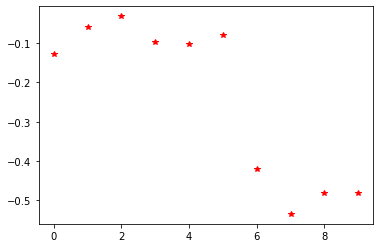

In [22]:
pre_y=m1.predict(x_2)
diff=[]
for i in range(len(y1)):
    diff.append(pre_y[i]-y1[i])
print(diff)
from sklearn.metrics import mean_squared_error
print('mse:',mean_squared_error(pre_y,y1))
import matplotlib.pyplot as plt
plt.plot(range(0,10),diff,':',c='r')

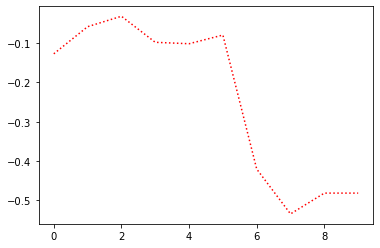

In [23]:
plt.plot(range(0,10),diff,':',c='r')

In [86]:
print(x_2.shape)

(20,)


In [88]:
print(data['oilprice'][20:30].shape)

(10,)
